In [3]:
# import the libraries
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
from tensorflow.keras import layers

2024-01-27 21:40:41.694114: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 21:40:41.727888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 21:40:41.727925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 21:40:41.729136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 21:40:41.734952: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 21:40:41.735902: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
# load the dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


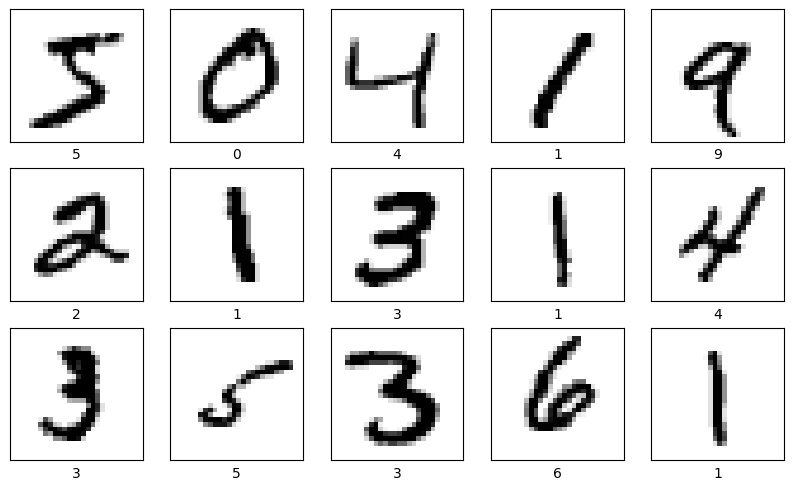

In [5]:
# Display some sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
# explore the dataset
len(X_train), len(X_test), X_train[0].shape

(60000, 10000, (28, 28))

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

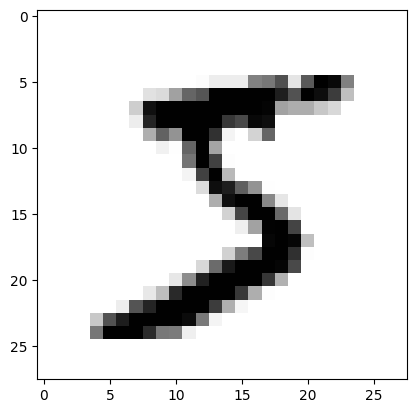

In [8]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

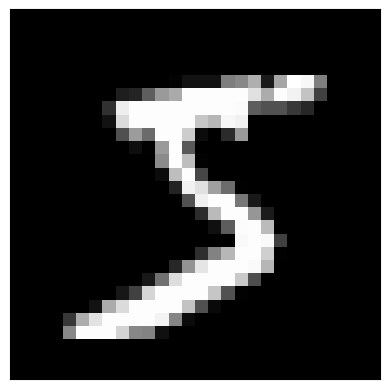

In [9]:
# display the image from the dataset in a matrix
plt.imshow(X_train[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [10]:
# disply the pixel values of the image
print('Pixel values')
for row in X_train[0]:
    for pixel in row:
        # print(f'{pixel:4d}', end=' ')
        print('{:2}'.format(pixel), end=' ')
    print()

Pixel values
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18 126 136 175 26 166 255 247 127  0  0  0  0 
 0  0  0  0  0  0  0  0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64  0  0  0  0 
 0  0  0  0  0  0  0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39  0  0  0  0  0 
 0  0  0  0  0  0  0 18 219 253 253 253 253 253 198 182 247 241  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0 80 156 107 253 253 205 11  0 43 154  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0 14  1 154 253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0

In [11]:
# to normalize the data into float32 values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [12]:
X_train[0].shape

(28, 28)

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.000 0.969 0.498 0.000 0.000

<Figure size 640x480 with 0 Axes>

<Axes: >

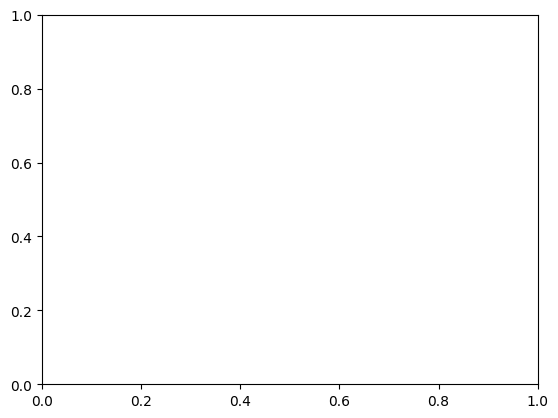

In [13]:
# display the pixel values of the image of normalization 
for row in X_train[0]:
    for pixel in row:
        print('{:0.3f}'.format(pixel), end=' ')
    print()

# reshape the image in a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# display the complete output of the image
display(plt.gcf())
display(plt.gca())

In [14]:
# build the model
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28 ,1))
 # cnn model
model=tf.keras.Sequential([
    input_layer, #input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 1
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 2
    layers.MaxPooling2D(), # pooling layer

    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 3
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 4
    layers.MaxPooling2D(), # pooling layer

    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

In [17]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15


2024-01-27 21:46:50.333998: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


 13/750 [..............................] - ETA: 10s - loss: 2.2762 - accuracy: 0.1875

2024-01-27 21:46:51.101476: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24837120 exceeds 10% of free system memory.
2024-01-27 21:46:51.101539: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24837120 exceeds 10% of free system memory.
2024-01-27 21:46:51.102635: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25992000 exceeds 10% of free system memory.
2024-01-27 21:46:51.102667: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25992000 exceeds 10% of free system memory.


750/750 [==============================] - 12s 15ms/step - loss: 0.3776 - accuracy: 0.8835 - val_loss: 0.1336 - val_accuracy: 0.9595
Epoch 2/15
750/750 [==============================] - 11s 15ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 3/15
750/750 [==============================] - 11s 15ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 4/15
750/750 [==============================] - 12s 16ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 5/15
750/750 [==============================] - 12s 16ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.0590 - val_accuracy: 0.9825
Epoch 6/15
750/750 [==============================] - 12s 15ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 7/15
750/750 [==============================] - 12s 16ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0505 - val_accuracy: 0.9846
Epo

In [19]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9906
Test Loss: 0.030935637652873993
Test Accuracy 0.9905999898910522


In [20]:
model.save('model_saved/model.h5')

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# get the image
img = x_test[569]
print(img.shape)

# reshape the image into (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28, 1)
(28, 28, 1)


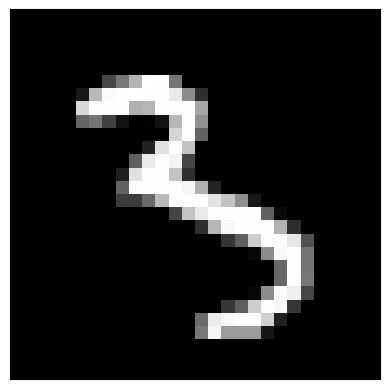

In [22]:
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [23]:
# predics the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 [==============================] - 0s 69ms/step
[[6.81479545e-14 1.71762882e-11 7.13085797e-07 9.99995708e-01
  1.38059806e-06 1.42277065e-06 3.54308444e-10 1.08281164e-07
  6.21211598e-07 4.97283534e-11]]


In [26]:
print(predictions[:, 3])

[0.9999957]


In [27]:
predictions.argmax()

3